In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,  precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

**Importing the data**

In [197]:
df1 = pd.read_csv('training_set_features.csv')
df2 = pd.read_csv('training_set_labels.csv')


**Merging of data**
we could also use the merge feature by passing the respondant id as on parameter 

In [198]:
df3 = pd.concat([df1,df2], axis = 'columns')

**Dropping unnecessary columns as well as duplicates and the rows which have all entries as null**

In [199]:
df3.drop( ['respondent_id', 'employment_industry','employment_occupation','hhs_geo_region'], axis = 'columns', inplace=True)
df3.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


In [200]:
df3.drop_duplicates()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0,0


In [201]:
df3.dropna(how='all', inplace=True)

In [202]:
df3.isnull().sum()

xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

<Axes: >

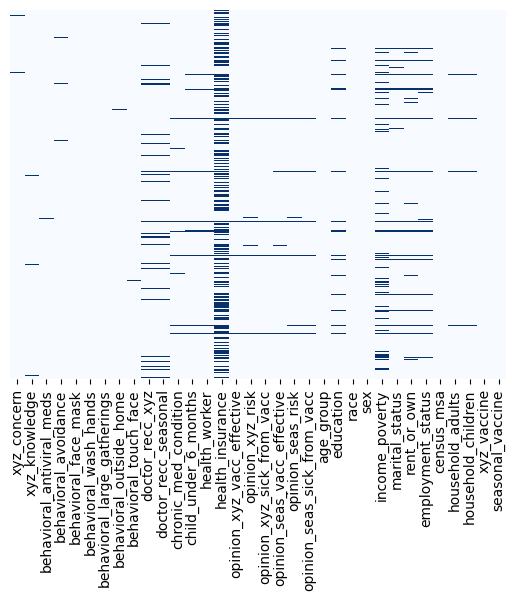

In [203]:
sns.heatmap(df3.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df3.columns)


**Data imputation and labelling**
Here we first divide the data into features and target variable and then we made a function to convert all the columns with str datatype to categorical integers 
Then we made a imputer function and filled all the missing values with most frequent values of that column 

In [204]:
feature_cols = df3.drop(['xyz_vaccine','seasonal_vaccine'] , axis = 'columns')
target_cols = df3[['xyz_vaccine','seasonal_vaccine']]

In [205]:
from sklearn.preprocessing import LabelEncoder
def encode_missing_columns(df, col):
    le = LabelEncoder()
    
    # gets unique values w/o NaN
    unique_without_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
    le.fit(unique_without_nan) # Fit on unique values
    
    # Set transformed col leaving np.NaN as they are
    df[col] = df[col].apply(lambda x: le.transform([x])[0] if type(x) == str else x)



In [206]:
encode_missing_columns(df3,'income_poverty')
encode_missing_columns(df3,'education')
encode_missing_columns(df3,'marital_status')
encode_missing_columns(df3,'employment_status')
encode_missing_columns(df3,'rent_or_own')
encode_missing_columns(df3,'age_group')
encode_missing_columns(df3,'race')
encode_missing_columns(df3,'sex')
encode_missing_columns(df3,'census_msa')




In [207]:
dfknn = df3.copy()
from sklearn.impute import SimpleImputer

# Extract feature column names by dropping the target columns
feature_cols = df3.drop(['xyz_vaccine', 'seasonal_vaccine'], axis=1).columns

# Separate the target columns
target_cols = df3[['xyz_vaccine', 'seasonal_vaccine']]

# Initialize KNNImputer
knn = SimpleImputer(strategy='most_frequent')

# Impute the feature columns
dfknn[feature_cols] = knn.fit_transform(df3[feature_cols])

<Axes: >

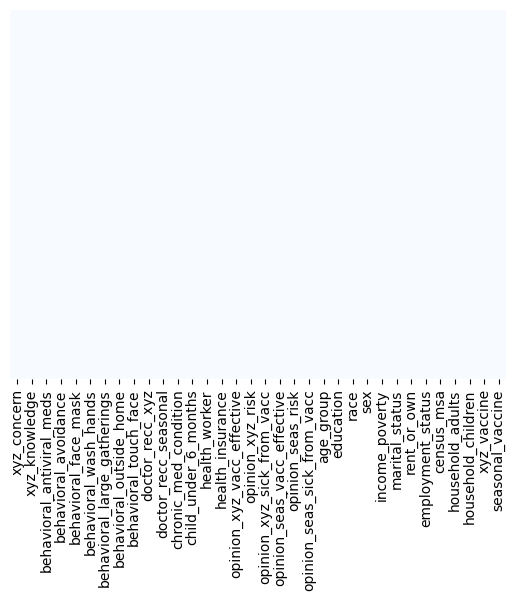

In [208]:
sns.heatmap(dfknn.isnull(),cmap= 'Blues', cbar = False,yticklabels=False , xticklabels=dfknn.columns) #as we can see in the graph all the missing values are filled 


**Dimension reduction**
We hereby selected the columns that are most significantly affecting our target variables on the basis of the correlation matrix values 
These columns are different for both the target variables

In [209]:
dfknn.corr()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
xyz_concern,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,0.136957,...,-0.127503,0.046844,-0.028045,0.000714,0.055753,0.004215,-0.016079,0.049441,0.121574,0.154488
xyz_knowledge,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,0.094135,...,-0.067567,-0.018002,-0.108783,-0.108313,-0.118124,-0.060630,0.023866,0.053378,0.117771,0.119779
behavioral_antiviral_meds,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,0.050882,...,-0.006196,0.061054,0.005924,0.056575,0.000885,0.012176,0.044829,0.083090,0.040226,0.006013
behavioral_avoidance,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,0.065589,...,-0.112591,0.016870,-0.045367,-0.028909,0.022550,-0.032665,0.017995,0.038977,0.046837,0.076130
behavioral_face_mask,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,0.079887,...,-0.049912,0.038494,0.001622,0.043492,0.027248,-0.003851,0.014191,0.004794,0.070413,0.050020
behavioral_wash_hands,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,0.086392,...,-0.157033,0.023675,-0.041226,-0.017509,0.001039,-0.016584,0.009367,0.047451,0.074570,0.112254
behavioral_large_gatherings,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,0.077143,...,-0.055871,0.015420,0.025476,0.047477,0.132775,0.037169,-0.030994,-0.009126,0.018089,0.063722
behavioral_outside_home,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,0.067136,...,-0.039100,0.034265,0.024708,0.063544,0.138451,0.028633,-0.026542,-0.008937,0.022080,0.053287
behavioral_touch_face,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,0.087201,...,-0.162693,0.003681,-0.027781,-0.017302,0.029249,0.004741,-0.001233,0.023739,0.070855,0.119925
doctor_recc_xyz,0.136957,0.094135,0.050882,0.065589,0.079887,0.086392,0.077143,0.067136,0.087201,1.000000,...,-0.041331,0.027327,-0.020290,0.001887,0.019265,-0.007640,0.009081,0.029398,0.394086,0.198560


In [210]:
df4 = dfknn.copy()

x1 = df4[['doctor_recc_xyz','opinion_xyz_vacc_effective','opinion_seas_vacc_effective','health_worker','xyz_concern','xyz_knowledge','doctor_recc_seasonal','opinion_xyz_risk','opinion_seas_risk','chronic_med_condition']]

In [211]:
x2 = df4[['xyz_concern','doctor_recc_xyz','doctor_recc_seasonal','chronic_med_condition','health_insurance','opinion_xyz_vacc_effective','opinion_xyz_risk','opinion_seas_vacc_effective','opinion_seas_risk','age_group']]

In [212]:
y = df4['xyz_vaccine']
z = df4['seasonal_vaccine']

**Dividing the data into training and testing values**

In [213]:
train_x1, test_x1, train_y,test_y = train_test_split(x1,y, test_size=0.20, random_state=42)



In [214]:
train_x2, test_x2, train_z,test_z = train_test_split(x2,y, test_size=0.20, random_state=42)



**Importing important libraries**

In [215]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from statistics import mode
from sklearn.linear_model import LogisticRegression


In [216]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
finalknnmodel = KNeighborsClassifier(n_neighbors=5)
finallrmodel = LogisticRegression()

finalknnmodel.fit(train_x1,train_y)


KNeighborsClassifier()

In [221]:
from sklearn.ensemble import StackingClassifier


**Now here we used the stack function to increase the accuracy of the model by using the best outputs and predictions**

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.70      0.43      0.53      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.83      0.84      0.83      5342

Accuracy on Test dataset by the combined model: 84.07%
precision on Test dataset by the combined model: 70.25%
f1score on Test dataset by the combined model: 0.5321605277625069


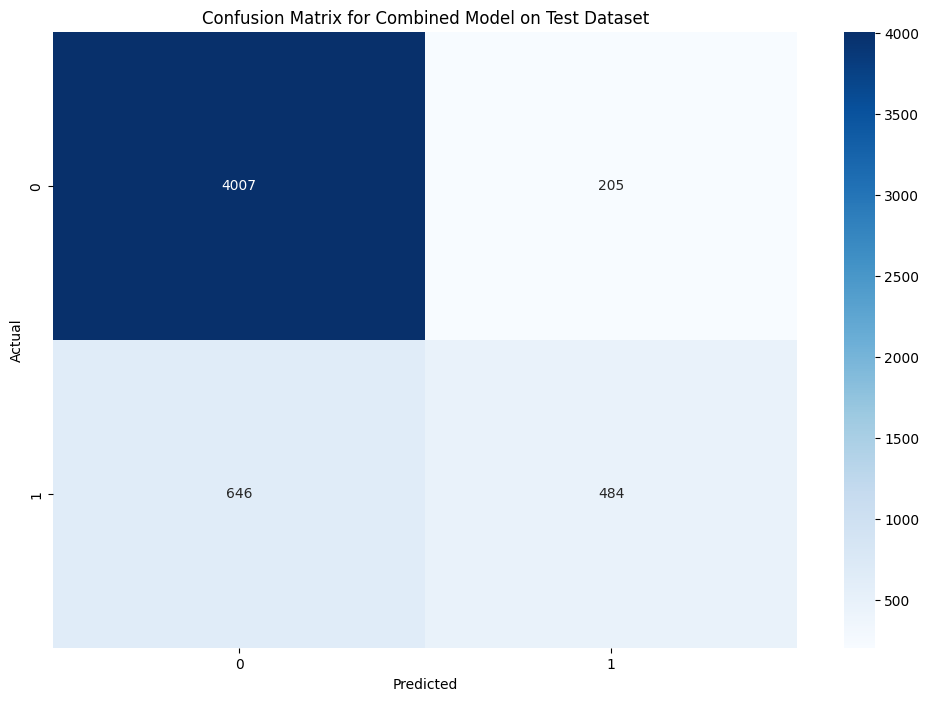

In [222]:
estimatorslist = [
    ('svm', final_svm_model),
    ('randomforest',final_rf_model),
    ('knn',finalknnmodel),
    ('gauss',final_nb_model),
    ('lrmodel',finallrmodel)
]
stack_model = StackingClassifier(
    estimators=estimatorslist, final_estimator=LogisticRegression()
)

stack_model.fit(train_x1, train_y)

final_preds = stack_model.predict(test_x1)


accuracy = accuracy_score(test_y, final_preds)
f1score = f1_score(test_y,final_preds)
precision = precision_score(test_y,final_preds)
print(classification_report(test_y,final_preds))
print(f"Accuracy on Test dataset by the combined model: {accuracy * 100:.2f}%")
print(f"precision on Test dataset by the combined model: {precision * 100:.2f}%")
print(f"f1score on Test dataset by the combined model: {f1score}")

# Generating confusion matrix
cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Another thing that we noticed here is that our data is doing very well on the 0 values but not so well with 1 values this is due to the impbalance in the dataset i tried
to reduce this difference using smot but it was not working very well for our overall accuracy

**AUC_ROC_score**

In [223]:
prob = stack_model.predict_proba(test_x1)
score = roc_auc_score(test_y, prob[:,1])
score

0.8251359369353469

**Training the model for the second target variable**

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.67      0.41      0.51      1130

    accuracy                           0.83      5342
   macro avg       0.76      0.68      0.70      5342
weighted avg       0.82      0.83      0.82      5342

Accuracy on Test dataset by the combined model: 83.19%
precision on Test dataset by the combined model: 66.76%
f1score on Test dataset by the combined model: 0.5071350164654226


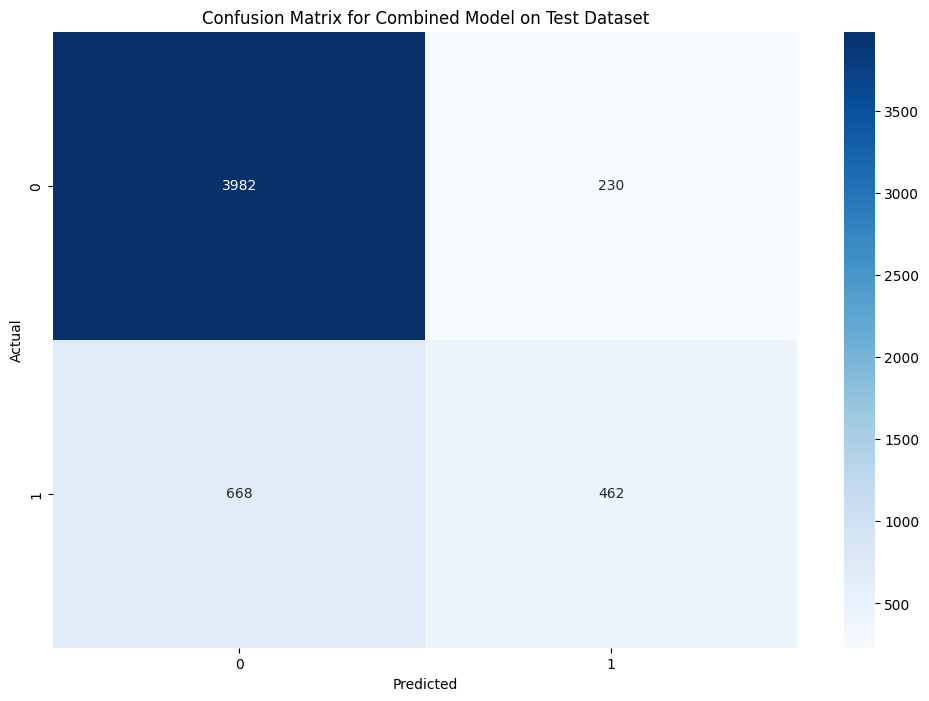

In [230]:

stack_model.fit(train_x2, train_z)

final_preds1 = stack_model.predict(test_x2)


accuracy = accuracy_score(test_z, final_preds1)
f1score = f1_score(test_z,final_preds1)
precision = precision_score(test_z,final_preds1)
print(classification_report(test_z,final_preds1))
print(f"Accuracy on Test dataset by the combined model: {accuracy * 100:.2f}%")
print(f"precision on Test dataset by the combined model: {precision * 100:.2f}%")
print(f"f1score on Test dataset by the combined model: {f1score}")

# Generating confusion matrix
cf_matrix = confusion_matrix(test_z, final_preds1)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**AUC_ROC_score**

In [231]:
probability = stack_model.predict_proba(test_x2)

auc_roc = roc_auc_score(test_z, probability[:,1])
auc_roc

0.82495556311928

**Importing the test data an than applying all the initial operations that we applied on training features to it**

In [237]:
data = pd.read_csv('test_set_features.csv')
data.drop( ['respondent_id', 'employment_industry','employment_occupation','hhs_geo_region'], axis = 'columns', inplace=True)



In [238]:
data.drop_duplicates()
data.dropna(how='all', inplace=True)


In [239]:
feature_cols = data.columns


In [240]:
from sklearn.preprocessing import LabelEncoder
def encode_missing_columns(df, col):
    le = LabelEncoder()
    
    # gets unique values w/o NaN
    unique_without_nan = pd.Series([i for i in df[col].unique() if type(i) == str])
    le.fit(unique_without_nan) # Fit on unique values
    
    # Set transformed col leaving np.NaN as they are
    df[col] = df[col].apply(lambda x: le.transform([x])[0] if type(x) == str else x)



In [241]:
encode_missing_columns(data,'income_poverty')
encode_missing_columns(data,'education')
encode_missing_columns(data,'marital_status')
encode_missing_columns(data,'employment_status')
encode_missing_columns(data,'rent_or_own')
encode_missing_columns(data,'age_group')
encode_missing_columns(data,'race')
encode_missing_columns(data,'sex')
encode_missing_columns(data,'census_msa')




In [242]:
dfknng = data.copy()
from sklearn.impute import SimpleImputer

# Extract feature column names by dropping the target columns
feature_cols = data.columns

# Initialize KNNImputer
knn = SimpleImputer(strategy='most_frequent')

# Impute the feature columns
dfknng[feature_cols] = knn.fit_transform(data[feature_cols])
topredict1 = dfknng[['doctor_recc_xyz','opinion_xyz_vacc_effective','opinion_seas_vacc_effective','health_worker','xyz_concern','xyz_knowledge','doctor_recc_seasonal','opinion_xyz_risk','opinion_seas_risk','chronic_med_condition']]
topredict2 = dfknng[['xyz_concern','doctor_recc_xyz','doctor_recc_seasonal','chronic_med_condition','health_insurance','opinion_xyz_vacc_effective','opinion_xyz_risk','opinion_seas_vacc_effective','opinion_seas_risk','age_group']]

**NOw training the model with all the training set and than predicting the value for our test data**

In [245]:

stack_model.fit(x1, y)

final_preds1 = stack_model.predict_proba(topredict1)

final_preds1[:,1]


array([0.10564532, 0.07333585, 0.41810599, ..., 0.13141534, 0.06143056,
       0.48611456])

In [246]:
xyz_vaccine_dose = pd.DataFrame(final_preds1[:,1], columns=['probability_xyz'])
xyz_vaccine_dose

,probability_xyz
0,0.105645
1,0.073336
2,0.418106
3,0.430230
4,0.268815
...,...
26703,0.284018
26704,0.203730
26705,0.131415
26706,0.061431


In [253]:

stack_model.fit(x2, z)

final_preds2 = stack_model.predict_proba(topredict2)

final_preds2[:,1]


array([0.15788097, 0.10779783, 0.80605106, ..., 0.2045781 , 0.35191642,
       0.67275575])

In [254]:
seasonal_vaccine_dose = pd.DataFrame(final_preds2[:,1], columns=['probability_seasonal'])


In [255]:
data1 = pd.read_csv('test_set_features.csv')


**Converting data to dataframe and finally our predictions to csv**

In [256]:
submission = pd.concat([data1['respondent_id'], xyz_vaccine_dose,seasonal_vaccine_dose], axis='columns')
submission
submission.to_csv('submissionfinal.csv',index=False)